## Оглавление

1. [Загрузка библиотек и данных](#load_data)
2. [Подготовка данных](#preprocessing)
    * [Достаем названия улиц из полного адреса](#1.1)
    * [Подготовим данные по районам](#1.2)
3. [Анализ данных](#analysis)
    * [Cоотношение видов объектов общественного питания по количеству](#3.1)
    * [Соотношение сетевых и несетевых заведений по количеству](#3.2)
    * [Виды объектов общественного питания для которых характерно сетевое распространение](#3.3)
    * [Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?](#3.4)
    * [Для каждого вида объекта общественного питания описать среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест?](#3.5)
    * [ТОП-10 улиц по кол-ву объектов](#3.6)
    * [Московские районы из ТОП-10](#3.7)
    * [Улицы с одним объектом, районы Москвы](#3.8)
    * [Диапазон посадочных мест в ТОП-10 списке](#3.9)
4. [Выводы и рекомендации](#conclusion)
    * [Вывод](#4.1)
    * [Рекомендации](#4.2)    

## Описание проекта

**Задача:**

Клиенты решили открыть небольшое кафе в Москве. Оно оригинальное — гостей должны обслуживать роботы. Проект многообещающий, но дорогой. Вместе с партнёрами они решились обратиться к инвесторам. Их интересует текущее положение дел на рынке — смогут ли они снискать популярность на долгое время, когда все зеваки насмотрятся на роботов-официантов?
<br>Клиентам необходимо подготовить исследование рынка. 
<br>
<br>У нас есть открытые данные о заведениях общественного питания в Москве.

**Анализ данных:**

 - Исследовать соотношение сетевых и несетевых заведений по количеству.
 - Для какого вида объекта общественного питания характерно сетевое распространение?
 - Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?
 - Для каждого вида объекта общественного питания описать среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест?
 - Выделить в отдельный столбец информацию об улице из столбца address.
 - Построить график топ-10 улиц по количеству объектов общественного питания. В каких районах Москвы находятся эти улицы?
 - Найти число улиц с одним объектом общественного питания. В каких районах Москвы находятся эти улицы?
 - Сделать общий вывод и дать рекомендации о виде заведения, количестве посадочных мест, а также районе расположения.

**Описание данных:**

Таблица rest_data:
 - id — идентификатор объекта;
 - object_name — название объекта общественного питания;
 - chain — сетевой ресторан;
 - object_type — тип объекта общественного питания;
 - address — адрес;
 - number — количество посадочных мест.

## <a id="load_data">Загрузка библиотек и данных</a>

In [1]:
#!pip install matplotlib -U
#!pip install plotly -U

In [2]:
import pandas as pd
import numpy as np
from scipy import stats as st
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly import graph_objects as go
import plotly.express as px

from io import BytesIO
import requests

In [3]:
# установим стандартный размер графиков для всего документа
%matplotlib inline
sns.set(rc={'figure.figsize':(18, 10)})

In [4]:
# загрузка файла с данными
rest = pd.read_csv('/datasets/rest_data.csv')

In [5]:
# устанавливает максимальную ширину столбца, что бы видеть все содержимое
pd.set_option('max_colwidth', 120) 

In [6]:
# просмотр первичной информации
display(rest.sample(20))
display(rest.info())
display(rest.describe())

,id,object_name,chain,object_type,address,number
13699,217925,Восточный дворик,нет,ресторан,"город Москва, Жулебинский бульвар, дом 9",95
2448,27934,Столовая гостиницы «Сокол»,нет,столовая,"город Москва, Чапаевский переулок, дом 12",82
14384,219448,Ресторан,нет,ресторан,"город Москва, улица Барклая, дом 10А",22
1159,124661,Кулинарная лавка братьев Караваевых,да,магазин (отдел кулинарии),"город Москва, 3-я Тверская-Ямская улица, дом 15",45
11914,170897,Папа Джонс,да,ресторан,"город Москва, квартал Волжский Бульвар 113а, корпус 1",12
14261,85340,JUNGLE JOY,нет,кафе,"город Москва, улица Перерва, дом 41",99
14594,204913,Вок мания,нет,предприятие быстрого обслуживания,"город Москва, Ореховый бульвар, дом 22А",10
8882,155099,Плов-Сити,нет,кафе,"город Московский, Солнечная улица, дом 3А, строение 1",20
14605,220130,Кафе,нет,кафе,"город Москва, Автозаводская улица, дом 23, строение 91",6
5041,28015,СТОЛОВАЯ при ТЭЦ-23,нет,столовая,"город Москва, Монтажная улица, дом 1/4, строение 1",58


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


None

,id,number
count,15366.000000,15366.000000
mean,119720.066901,59.547182
std,73036.130732,74.736833
min,838.000000,0.000000
25%,28524.000000,12.000000
50%,144974.500000,40.000000
75%,184262.250000,80.000000
max,223439.000000,1700.000000


## <a id="preprocessing">Подготовка данных</a>

In [7]:
rest.columns # проверяем названия колонок на корректность

Index(['id', 'object_name', 'chain', 'object_type', 'address', 'number'], dtype='object')

In [8]:
#rest.duplicated(subset=['id', 'object_name', 'chain', 'object_type', 'address', 'number']).sum() # ищем дубликаты
rest.duplicated(subset=['object_name', 'chain', 'object_type', 'address', 'number']).sum()

82

In [9]:
rest.isna().sum() # ищем пропуски

id             0
object_name    0
chain          0
object_type    0
address        0
number         0
dtype: int64

In [10]:
display(rest['object_type'].unique()) # проверяем уникальные значения

array(['кафе', 'столовая', 'закусочная',
       'предприятие быстрого обслуживания', 'ресторан', 'кафетерий',
       'буфет', 'бар', 'магазин (отдел кулинарии)'], dtype=object)

In [11]:
# меняем значения на "удобные"
rest = rest.replace({'object_type': {'предприятие быстрого обслуживания':'фаст-фуд', 'магазин (отдел кулинарии)':'кулинария'}})

In [12]:
display(rest['object_type'].unique()) # проверяем все ли получилось

array(['кафе', 'столовая', 'закусочная', 'фаст-фуд', 'ресторан',
       'кафетерий', 'буфет', 'бар', 'кулинария'], dtype=object)

In [13]:
display(rest['chain'].unique()) # проверяем уникальные значения

array(['нет', 'да'], dtype=object)

### <a id="1.1">Достаем названия улиц из полного адреса</a>

In [14]:
i = rest['address']

listing = []
for i in rest['address']:  
    begin = i.find('город москва')
    end = i.find('дом')
    listing.append(i[begin+15:end-2])

In [51]:
rest['street'] = listing
display(rest.sample(60))

,id,object_name,chain,object_type,address,number,street
11463,184564,ВКУС ДНЯ,нет,буфет,"город Москва, Кировоградская улица, дом 15",24,Кировоградская улица
13268,202506,Алиса,нет,кафе,"город Москва, поселение Сосенское, посёлок Коммунарка, улица Александры Монаховой, дом 96, корпус 2",15,"поселение Сосенское, посёлок Коммунарка, улица Александры Монаховой"
12356,193767,Шаурма,нет,фаст-фуд,"город Москва, 15-я Парковая улица, дом 50",0,15-я Парковая улица
10138,172651,Шаверма,нет,фаст-фуд,"город Москва, Каширское шоссе, дом 44, корпус 1",28,Каширское шоссе
7109,83326,Ресторан Купец,нет,кафе,"город Москва, Лобненская улица, дом 11",80,Лобненская улица
2325,129804,Лора Крафт,нет,бар,"город Москва, улица Покровка, дом 1/13/6, строение 2",50,улица Покровка
2571,20507,Джаз,нет,ресторан,"город Москва, улица Академика Пилюгина, дом 10",80,улица Академика Пилюгина
209,156659,Loft 17,нет,бар,"город Москва, Волгоградский проспект, дом 17",55,Волгоградский проспект
8918,70973,Бургер Кинг,да,фаст-фуд,"город Москва, Дмитровское шоссе, дом 163А, корпус 1",60,Дмитровское шоссе
3621,142570,Квартира 44,да,кафе,"город Москва, улица Малая Ордынка, дом 24",38,улица Малая Ордынка


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Отличный способ выделения улицы, молодец</div>


### <a id="1.2">Подготовим данные по районам</a>

Нам понадобятся данные о районах Москвы, лучше подготовить их заранее, а потом просто использовать.

In [17]:
# сохраним данные в файл на ГуглДокс
spreadsheet_id = '1jB0T2q4XbQMUOSVmjCMS8cJDhBjdmhJcWcwsV_WcsQM'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
moscow_streets = pd.read_csv(BytesIO(r.content))
moscow_streets.head()

,streetname,areaid,okrug,area
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район
3,Глубокий переулок,17,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район


In [18]:
moscow_streets.rename(columns={'streetname' : 'street', 'areaid' : 'area_id'}, inplace = True)
moscow_streets

,street,area_id,okrug,area
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район
3,Глубокий переулок,17,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район
...,...,...,...,...
4393,Вознесенский проезд,17,ЦАО,Пресненский район
4394,Волков переулок,17,ЦАО,Пресненский район
4395,Поварская улица,17,ЦАО,Пресненский район
4396,Кудринская площадь,17,ЦАО,Пресненский район


#### Вывод:

Достаточно чистые данные. Мы провели такую работу:
 - создали дополнительный столбец с названием улиц;
 - переименовали некоторые названия в более "удобные";
 - собрали данные по районам города, они нам понадобятся позже.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
С данными разобрались, действительно довольно чистые</div>


## <a id="analysis">Анализ данных</a>

### <a id="3.1">Cоотношение видов объектов общественного питания по количеству</a>

In [19]:
# сгруппируем объекты по их видам
rest_group_obj_type = rest.groupby('object_type').count().reset_index()

In [20]:
rest_group_obj_type

,object_type,id,object_name,chain,address,number,street
0,бар,856,856,856,856,856,856
1,буфет,585,585,585,585,585,585
2,закусочная,360,360,360,360,360,360
3,кафе,6099,6099,6099,6099,6099,6099
4,кафетерий,398,398,398,398,398,398
5,кулинария,273,273,273,273,273,273
6,ресторан,2285,2285,2285,2285,2285,2285
7,столовая,2587,2587,2587,2587,2587,2587
8,фаст-фуд,1923,1923,1923,1923,1923,1923


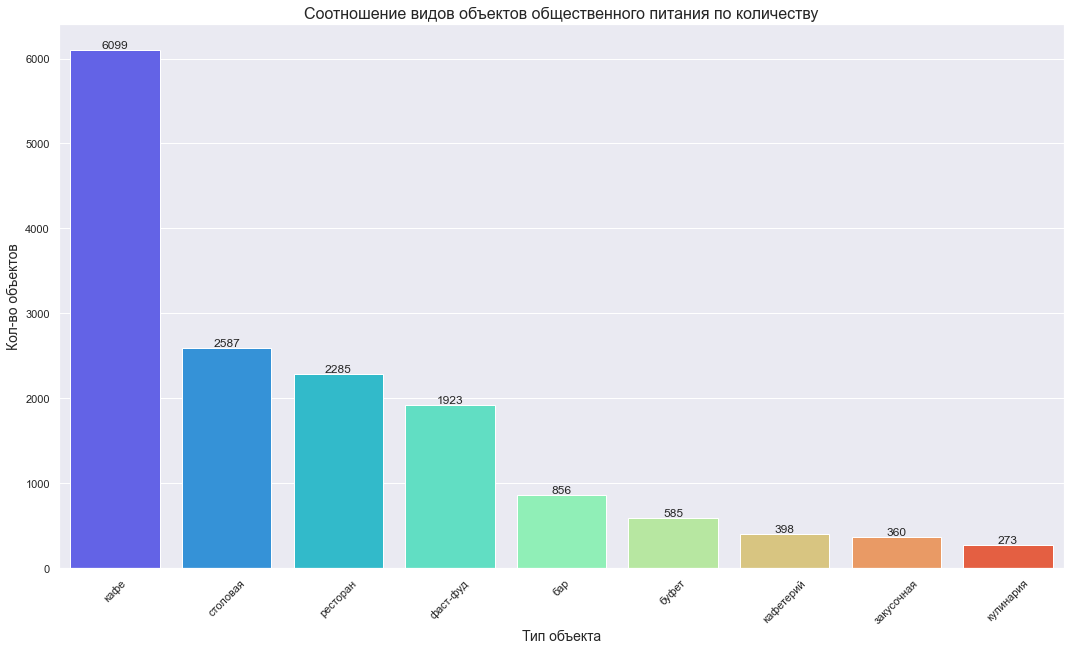

In [21]:
# построим график
ax = sns.barplot(x='object_type', y='object_name', data=rest_group_obj_type
                 .sort_values(by='number', ascending=False), 
                 palette='rainbow')
for i in ax.containers:
    ax.bar_label(i)
plt.xticks(rotation=45)
plt.ylabel('Кол-во объектов', size=14)
plt.xlabel('Тип объекта', size=14)
plt.title('Соотношение видов объектов общественного питания по количеству', size=16)
plt.show()

#### Вывод:
Итак, кафе впереди планеты всей - 6099 объектов, на втором месте идут столовые - 2587 объектов, затем, с небольшим отставанием, рестораны - 2285 объектов.

### <a id="3.2">Соотношение сетевых и несетевых заведений по количеству</a>

In [22]:
rest_group_chain_object = rest.groupby('chain')['id'].count()

In [23]:
chain_object = [
    'сетевое',
    'не сетевое'
]
values = rest_group_chain_object
fig = go.Figure(data=[go.Pie(labels=chain_object, values=values, textinfo='label+percent')])
fig.update_layout(title_text='Cоотношение сетевых и несетевых заведений по количеству')
fig.show() 

#### Вывод:
С четырехкратным отрывом лидируют несетевые заведения.

### <a id="3.3">Виды объектов общественного питания для которых характерно сетевое распространение</a>

In [24]:
rest_group_chain_type = (rest.query('chain == "да"')
                        .groupby('object_type').agg({'id':'count'})
                        .reset_index().sort_values(by='id', ascending=False))

In [25]:
fig = go.Figure(data=[go.Pie(labels=rest_group_chain_type['object_type'], 
                             values=rest_group_chain_type['id'], textinfo='label+percent')])
fig.update_layout(title_text='Cоотношение общественных заведений для сетевиков')
fig.show() 

#### Вывод:
Вполне логичный итог:
 - кафе;
 - фаст-фуд;
 - рестораны.

### <a id="3.4">Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?</a>

In [27]:
# отберем все сетевые предприятия
rest_group_chain = rest.query('chain == "да"')
rest_group_chain

,id,object_name,chain,object_type,address,number,street
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
6,148815,Брусника,да,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10,переулок Сивцев Вражек
13,22579,Алло Пицца,да,кафе,"город Москва, улица Авиаторов, дом 14",32,улица Авиаторов
16,144107,Суши Wok,да,фаст-фуд,"город Москва, Азовская улица, дом 3",7,Азовская улица
18,58565,Тануки,да,ресторан,"город Москва, Большая Академическая улица, дом 65",160,Большая Академическая улица
...,...,...,...,...,...,...,...
15361,208537,Шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50,3-й Крутицкий переулок
15362,209264,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10,улица Земляной Вал
15363,209186,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20,улица Земляной Вал
15364,221900,Шоколадница,да,кафе,"город Москва, поселение Московский, Киевское шоссе, 22-й километр, домовладение 4, строение 1",36,"поселение Московский, Киевское шоссе, 22-й километр"


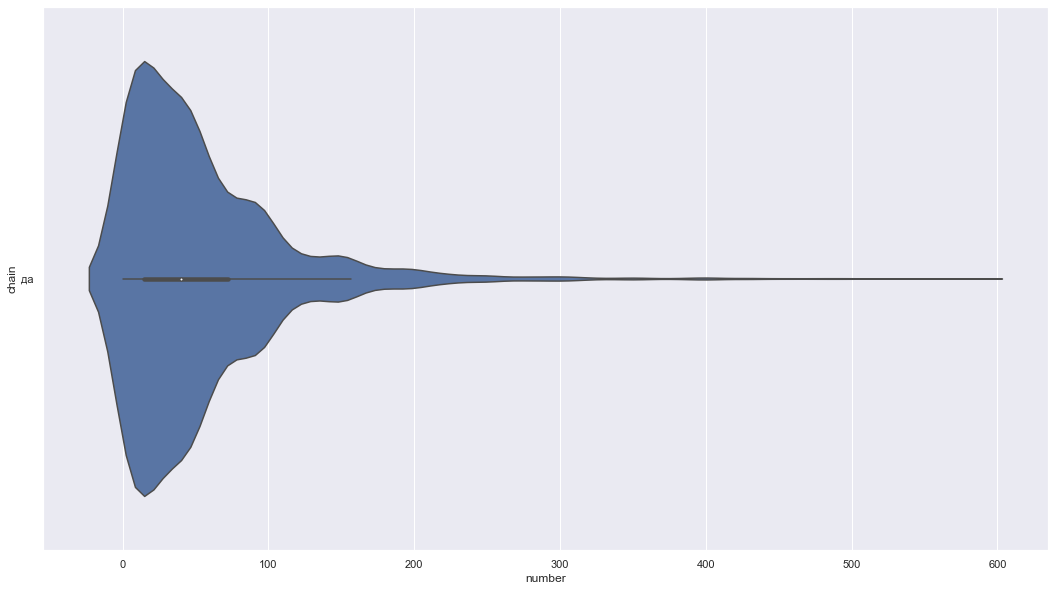

In [28]:
ax = sns.violinplot(x='number', y='chain', data=rest_group_chain)

In [29]:
rest_group_chain['number'].describe()

count    2968.000000
mean       52.919811
std        57.140644
min         0.000000
25%        15.000000
50%        40.000000
75%        72.000000
max       580.000000
Name: number, dtype: float64

#### Вывод:

Мы имеем большое количество заведений с малым количеством мест.

### <a id="3.5">Для каждого вида объекта общественного питания описать среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест?</a>

In [32]:
rest.groupby('object_type')['number'].describe().sort_values(by='mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
object_type,,,,,,,,
столовая,2587.0,130.246618,95.179313,0.0,50.0,103.0,200.0,1400.0
ресторан,2285.0,96.834136,94.756542,0.0,46.0,80.0,114.0,1500.0
буфет,585.0,51.129915,56.331974,0.0,14.0,32.0,80.0,320.0
бар,856.0,43.494159,67.082876,0.0,20.0,35.0,50.0,1700.0
кафе,6099.0,39.716019,37.720947,0.0,15.0,30.0,50.0,533.0
фаст-фуд,1923.0,20.552262,38.366974,0.0,0.0,5.0,25.0,580.0
кафетерий,398.0,9.123116,14.639150,0.0,0.0,6.0,12.0,200.0
закусочная,360.0,7.608333,16.650912,0.0,0.0,0.0,10.0,216.0
кулинария,273.0,5.589744,9.872729,0.0,0.0,0.0,8.0,50.0


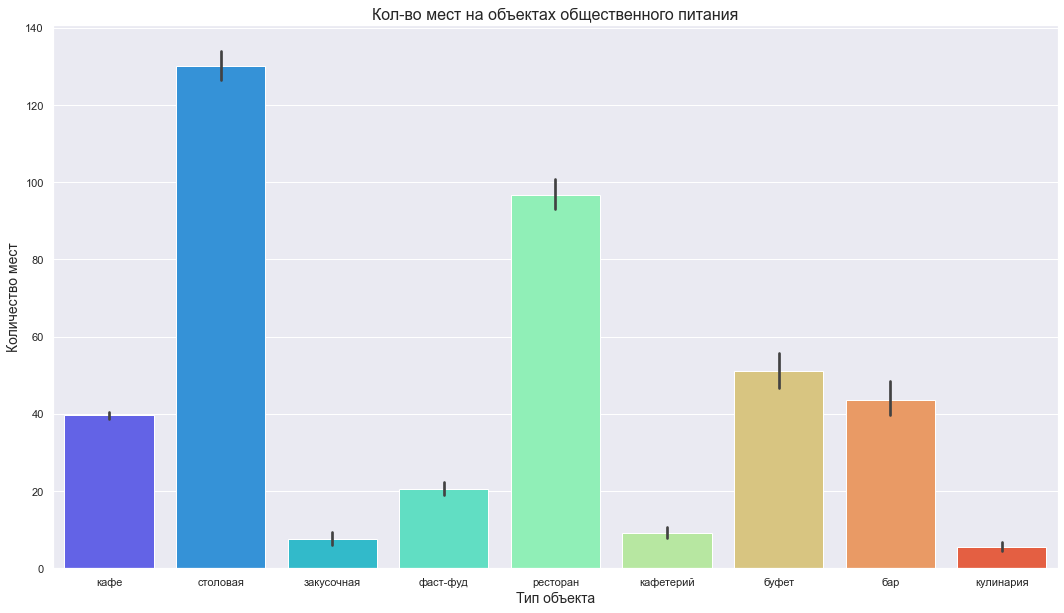

In [33]:
ax = sns.barplot(x='object_type', y='number', data=rest, palette='rainbow')
ax.set_xlabel('Тип объекта', size=14)
ax.set_ylabel('Количество мест', size=14)
ax.set_title('Кол-во мест на объектах общественного питания', size=16)
plt.show()

#### Вывод:
 - столовые и рестораны на первых местах, логичный результат;
 - остальные заведения имеют не большое количество посадочных мест, скорее всего, это связано с тем, что речь идет о небольших заведениях, начиная с баров и ресторанах на фуд-кортах в ТРЦ и заканчивая палатками, торгующими шаурмой и хот-догами.

### <a id="3.">ТОП-10 улиц по кол-ву объектов</a>

In [34]:
rest_object_street = (rest.groupby(['street'])
                      .agg({'object_name':'count'})
                      .sort_values(by='object_name', ascending=False)
                      .reset_index())

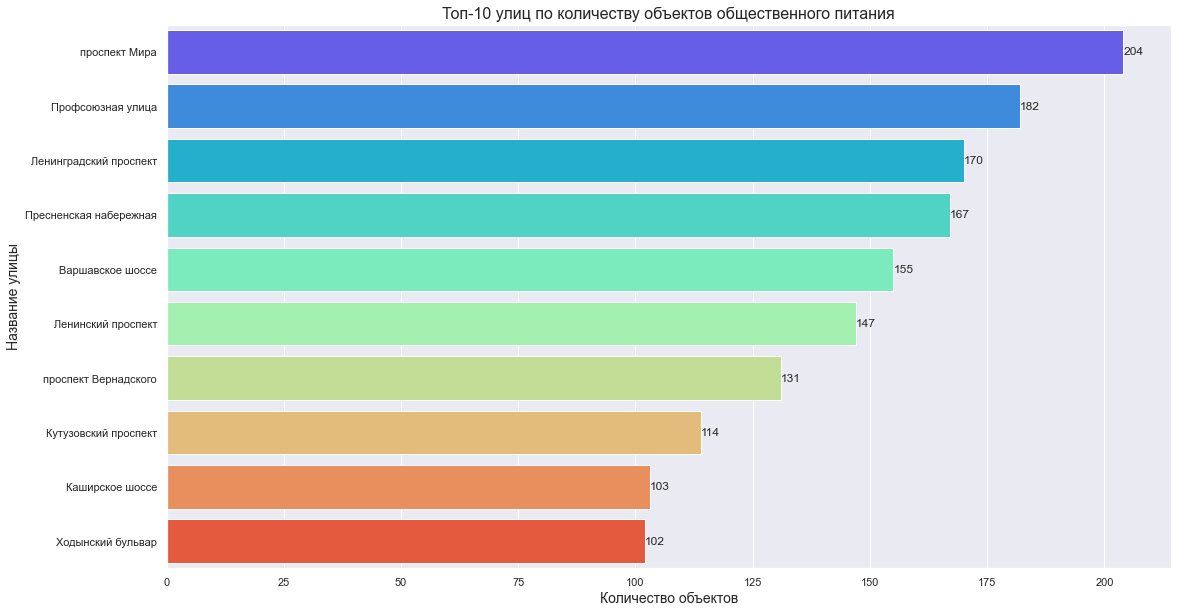

In [35]:
ax = sns.barplot(y='street', x='object_name', data=rest_object_street.head(10), palette='rainbow')
for i in ax.containers:
    ax.bar_label(i)
ax.set_xlabel('Количество объектов', size=14)
ax.set_ylabel('Название улицы', size=14)
ax.set_title('Топ-10 улиц по количеству объектов общественного питания', size=16)
plt.show()

### <a id="3.7">Московские районы из ТОП-10</a>

Вспоминаем, что в самом начале работы мы составили таблицу с районами Москвы, ее час настал.

In [36]:
rest_object_street_top10 = rest_object_street.head(10) # новая таблица с ТОП-10 улиц
top10 = rest_object_street_top10.merge(moscow_streets, on='street', how='left') # объединяем с таблицей районов
top10.sample(10)

,street,object_name,area_id,okrug,area
29,Ленинский проспект,147,124,ЮЗАО,Район Гагаринский
18,Варшавское шоссе,155,109,ЮАО,Район Чертаново Центральное
39,Кутузовский проспект,114,38,ЗАО,Район Дорогомилово
20,Варшавское шоссе,155,110,ЮАО,Район Чертаново Южное
0,проспект Мира,204,70,СВАО,Алексеевский район
21,Варшавское шоссе,155,99,ЮАО,Донской район
1,проспект Мира,204,86,СВАО,Ярославский Район
19,Варшавское шоссе,155,108,ЮАО,Район Чертаново Северное
6,проспект Мира,204,16,ЦАО,Мещанский район
40,Кутузовский проспект,114,49,ЗАО,Район Фили-Давыдково


In [37]:
# приведем в более читаемый вид
top10_pivot = top10.pivot_table(index=['street', 'okrug', 'area'], 
                  values='object_name', 
                  aggfunc='max').sort_values(by='object_name', ascending=False)
top10_pivot

object_name
street                 okrug area                                        
проспект Мира          ЦАО   Мещанский район                          204
                       СВАО  Ярославский Район                        204
                             Район Свиблово                           204
                             Район Ростокино                          204
                             Район Марьина роща                       204
                             Останкинский район                       204
                             Алексеевский район                       204
Профсоюзная улица      ЮЗАО  Район Коньково                           182
                             Академический район                      182
                             Обручевский район                        182
                             Район Черемушки                          182
                             Район Теплый Стан                        182
                             Район Ясенево                            182
Ленинградский проспект САО   Район Аэропорт                           170
                             Район Беговой                            170
                             Район Сокол                              170
                             Хорошевский район                        170
Пресненская набережная ЦАО   Пресненский район                        167
Варшавское шоссе       ЮАО   Нагорный район                           155
                             Донской район                            155
                             Район Нагатино-Садовники                 155
                             Район Чертаново Северное                 155
                             Район Чертаново Центральное              155
                             Район Чертаново Южное                    155
                       ЮЗАО  Район Северное Бутово                    155
                             Район Южное Бутово                       155
Ленинский проспект     ЦАО   Район Якиманка                           147
                       ЮАО   Донской район                            147
                       ЮЗАО  Обручевский район                        147
                             Район Теплый Стан                        147
                             Ломоносовский район                      147
                       ЗАО   Район Тропарево-Никулино                 147
                       ЮЗАО  Район Гагаринский                        147
                       ЗАО   Район Проспект Вернадского               147
проспект Вернадского   ЮЗАО  Ломоносовский район                      131
                       ЗАО   Район Проспект Вернадского               131
                             Район Раменки                            131
                             Район Тропарево-Никулино                 131
                       ЮЗАО  Район Гагаринский                        131
Кутузовский проспект   ЗАО   Район Дорогомилово                       114
                             Район Фили-Давыдково                     114
Каширское шоссе        ЮАО   Район Орехово-Борисово Южное             103
                             Район Орехово-Борисово Северное          103
                             Район Москворечье-Сабурово               103
                             Район Нагатино-Садовники                 103
Ходынский бульвар      САО   Хорошевский район                        102

Есть очень длинные улицы, которые проходят через несколько районов, надо увидеть сколько их.

In [38]:
streets_len=(top10_pivot.reset_index()
            .groupby('street')['area'].count().reset_index()
            .sort_values(by='area', ascending=False)
            .rename(columns=({'area':'districts'})))
streets_len

,street,districts
0,Варшавское шоссе,8
4,Ленинский проспект,8
9,проспект Мира,7
6,Профсоюзная улица,6
8,проспект Вернадского,5
1,Каширское шоссе,4
3,Ленинградский проспект,4
2,Кутузовский проспект,2
5,Пресненская набережная,1
7,Ходынский бульвар,1


### <a id="3.8">Улицы с одним объектом, районы Москвы</a>

In [39]:
rest_one_object_street = rest_object_street[rest_object_street['object_name'] == 1]['street'].nunique()
rest_one_object_street

795

In [40]:
object_name_count = rest_object_street.merge(moscow_streets, on='street', how='left')
object_name_count

,street,object_name,area_id,okrug,area
0,проспект Мира,204,70.0,СВАО,Алексеевский район
1,проспект Мира,204,86.0,СВАО,Ярославский Район
2,проспект Мира,204,78.0,СВАО,Район Марьина роща
3,проспект Мира,204,79.0,СВАО,Останкинский район
4,проспект Мира,204,81.0,СВАО,Район Ростокино
...,...,...,...,...,...
2738,6-я улица Лазенки,1,42.0,ЗАО,Район Ново-Переделкино
2739,6-я Кожуховская улица,1,122.0,ЮВАО,Южнопортовый Район
2740,Челюскинская улица,1,76.0,СВАО,Лосиноостровский район
2741,6-й Лучевой просек,1,26.0,ВАО,Район Сокольники


In [41]:
object_name_count['area'].value_counts().to_frame()

,area
Тверской район,106
Пресненский район,87
Таганский район,81
Басманный район,80
Район Хамовники,74
...,...
Район Новокосино,4
Район Капотня,3
Панфиловский район,3
Район Восточный,3


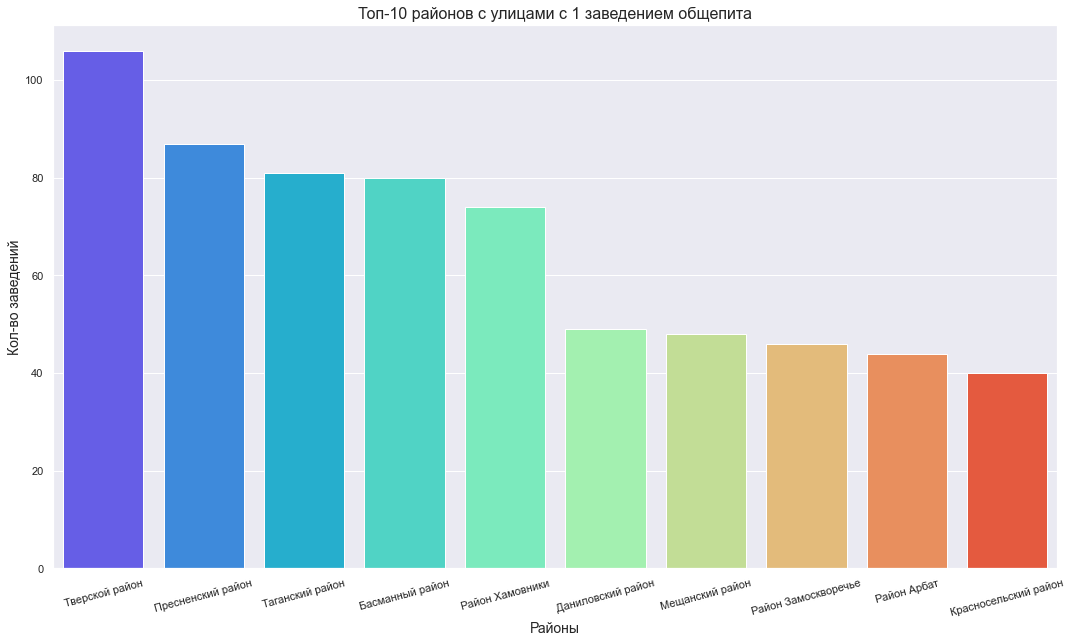

In [42]:
sns.barplot(data = object_name_count['area'].value_counts().reset_index().head(10), x='index', y='area', palette='rainbow')
plt.xticks(rotation=15)
plt.title('Топ-10 районов с улицами с 1 заведением общепита', size=16)
plt.xlabel('Районы', size=14)
plt.ylabel('Кол-во заведений', size=14)
plt.show()

#### Вывод:
Достаточно много "одиноких" заведений в этих районах, думаю причины такие:
 - высокая арендная плата;
 - малая проходимость улиц.

### <a id="3.9">Диапазон посадочных мест в ТОП-10 списке</a>

Посмотрим информацию для рекомендаций по количеству посадочных мест в новом заведении.

In [43]:
objects_to_top10 =  rest[rest['street'].isin(top10['street'].tolist())]
objects_to_top10

,id,object_name,chain,object_type,address,number,street
151,155973,Кафе «Андерсон»,да,кафе,"город Москва, Варшавское шоссе, дом 2",150,Варшавское шоссе
152,23618,Кафе «Subway»,да,кафе,"город Москва, Варшавское шоссе, дом 7, корпус 1",36,Варшавское шоссе
153,155852,Кафе «Ламаджо»,нет,кафе,"город Москва, Варшавское шоссе, дом 29",30,Варшавское шоссе
154,152556,Шаурма в пите,нет,фаст-фуд,"город Москва, Варшавское шоссе, дом 72, корпус 2",0,Варшавское шоссе
155,120658,Выпечка,нет,кафетерий,"город Москва, Варшавское шоссе, дом 100",2,Варшавское шоссе
...,...,...,...,...,...,...,...
15325,198436,Милти,да,фаст-фуд,"город Москва, Ленинградский проспект, дом 80, корпус 17",0,Ленинградский проспект
15347,222491,Кальянная «Мята Lounge»,да,кафе,"город Москва, Профсоюзная улица, дом 142, корпус 1, строение 1",40,Профсоюзная улица
15350,213061,Мята,да,кафетерий,"город Москва, Каширское шоссе, дом 96, корпус 1",35,Каширское шоссе
15358,213724,Шоколадница,да,кафе,"город Москва, Варшавское шоссе, дом 87Б",54,Варшавское шоссе


In [44]:
objects_to_top10.groupby('street')['number'].describe()

,count,mean,std,min,25%,50%,75%,max
street,,,,,,,,
Варшавское шоссе,155.0,53.967742,76.033863,0.0,9.00,30.0,67.00,500.0
Каширское шоссе,103.0,59.038835,90.350833,0.0,9.50,30.0,80.00,680.0
Кутузовский проспект,114.0,85.061404,194.464196,0.0,20.00,40.0,96.00,1700.0
Ленинградский проспект,170.0,52.941176,63.282938,0.0,15.25,40.0,70.00,625.0
Ленинский проспект,147.0,63.469388,67.969706,0.0,20.00,45.0,80.00,495.0
Пресненская набережная,167.0,45.844311,65.316834,0.0,8.50,30.0,50.00,478.0
Профсоюзная улица,182.0,46.412088,56.146419,0.0,5.00,24.0,63.75,240.0
Ходынский бульвар,102.0,18.950980,31.224951,0.0,0.00,10.0,27.00,250.0
проспект Вернадского,131.0,66.061069,121.882463,0.0,20.00,40.0,80.00,1288.0


#### Вывод:
Судя по цифрам в таблице самым актуальным диапазоном яляется от 25 до 40 посадочных мест.

## <a id="conclusion">Выводы и рекомендации</a>

**Цели исследования:**

 - Определить соотношение сетевых и несетевых заведений по количеству.
 - Для какого вида объекта общественного питания характерно сетевое распространение?
 - Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?
 - Какой вид предоставляет в среднем самое большое количество посадочных мест?
 - Выделить топ-10 улиц по количеству объектов общественного питания. В каких районах Москвы находятся эти улицы?
 - Найти число улиц с одним объектом общественного питания. В каких районах Москвы находятся эти улицы?

### <a id="4.1">Вывод:</a>
По итогам анализа данных, можно сказать, что:
 - сетевых заведений в Москве почти в 4 раза меньше, чем несетевых;
 - сетевое распостранение больше всего характерно для кафе, на втором и третьем месте фаст-фуд и рестораны, соответственно;
 - среди сетевых заведений преобладает формат с большим количеством объектов, но с малым количеством мест;
 - по количеству посадочных мест лидируют столовые и рестораны;
 - в топ-10 улиц с наибольшим количеством заведений общепита вошли: проспект Мира, Профсоюзная улица, Ленинградский проспект, Пресненская набережная, Варшавское шоссе, Ленинский проспект, проспект Вернадского, Кутузовский проспект, Каширское шоссе и Кировоградская улица. Каждая из этих улиц проходит через несколько районов, что неудивительно ввиду их протяжённости;
 - в Москве 795 заведений, которые в одиночку распологаются на целой улице, большая часть этих заведений находится в Тверском районе.

### <a id="4.2">Рекомендации:</a>
 - заведение следует открывать в формате кафе, из-за большей доступности и возможности распространения;
 - рекомендуемый диапазон посадочных мест от 25 до 40, но не более 45-50;
 - место следует искать в районах приближенных к центру города, имеющих большую пропускную способность.

**Небольшое дополнение:**
<br>Начать такой бизнес имеет смысл, т.к. тема IT и роботехники сейчас популярна как никогда.
<br>
<br>**НО:**
 - в ходе анализа не были учтены характеристики роботов, которые будут заниматься обслуживанием, по этому рекомендации по количеству посадочных мест имеют необязательный характер.